In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
dataset = pd.read_csv("50_Startups.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [3])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))


In [4]:
# split dataset in training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# training the model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [7]:
# predicting test set results
y_pred = regressor.predict(X_test)

np.set_printoptions(precision=2)

print(
    np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
)


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


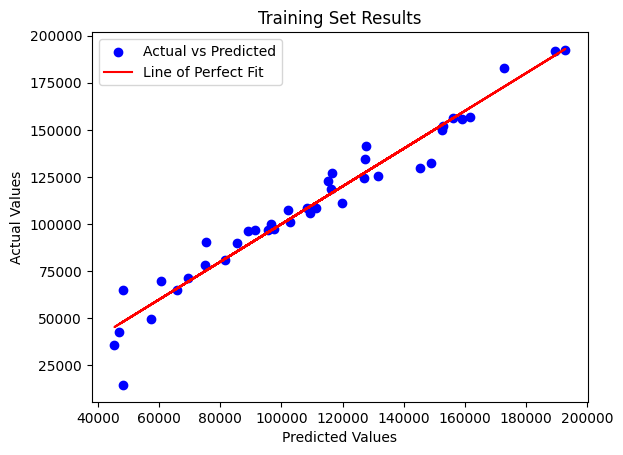

In [8]:
# Visualizing the training set results
plt.scatter(regressor.predict(X_train), y_train, color="blue", label="Actual vs Predicted")
plt.plot(regressor.predict(X_train), regressor.predict(X_train), color="red", label="Line of Perfect Fit")
plt.title("Training Set Results")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend()
plt.show()


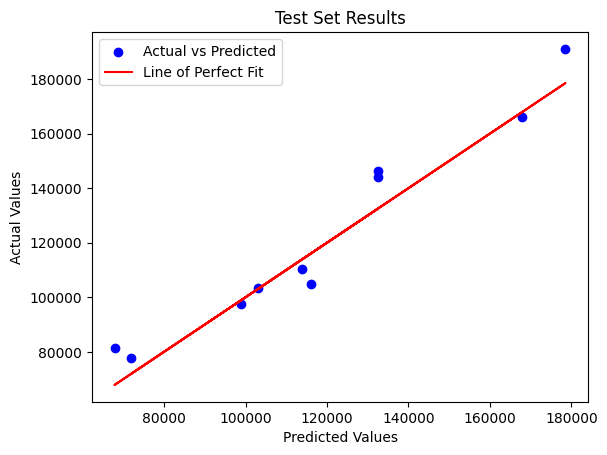

In [9]:
# Visualizing the test set results
plt.scatter(regressor.predict(X_test), y_test, color="blue", label="Actual vs Predicted")
plt.plot(regressor.predict(X_test), regressor.predict(X_test), color="red", label="Line of Perfect Fit")
plt.title("Test Set Results")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend()
plt.show()
